<h3>Import necessary libraries and dataset</h3>

In [1]:
#Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Load Data
df = pd.read_csv("MNIST.csv")

In [3]:
#List the first 5 rows of datas.
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df["label"]
x = df.drop(columns="label",axis=1)

In [5]:
#Normalise the Data using Standard Scaler.
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
#Find the shape of x.
x.shape

(70000, 784)

In [7]:
#For simplicity take the first 1000 datas as training datas.
x1000 = x[0:1000,:]
y1000 = y[0:1000]

In [8]:
#Import TSNE Library and reduce the dimensions.
from sklearn.manifold import TSNE
model = TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data = model.fit_transform(x1000)

In [9]:
#Find the shape of newly created dataset.
tsne_data.shape

(1000, 2)

In [10]:
#List the first 5 rows of newly created dataset.
tsne_data[0:5,:]

array([[  2.7964323,  30.981907 ],
       [-10.438153 , -25.426647 ],
       [ 20.608427 , -23.324644 ],
       [-18.72011  ,   8.85447  ],
       [ 23.044931 ,  -2.614431 ]], dtype=float32)

In [11]:
#Display the newly created dataset as DataFrame using numpy library.
newdf = pd.DataFrame(tsne_data,index=np.arange(0,1000),columns=["Dim1","Dim2"])
newdf["labels"] = y1000.astype(float)
newdf.head()

,Dim1,Dim2,labels
0,2.796432,30.981907,5.0
1,-10.438153,-25.426647,0.0
2,20.608427,-23.324644,4.0
3,-18.720110,8.854470,1.0
4,23.044931,-2.614431,9.0


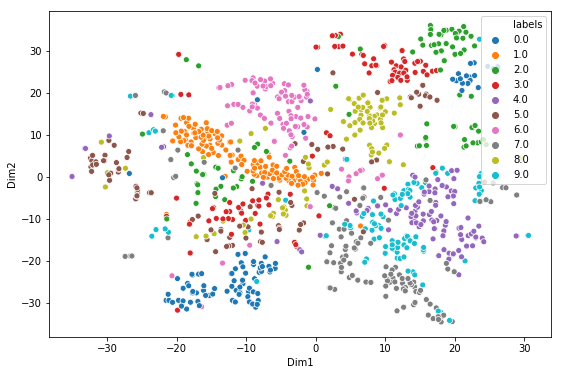

In [12]:
#Generate the basic scatter plot.
plt.figure(figsize=(9,6))
pallt = sns.color_palette()
sns.scatterplot(newdf["Dim1"],newdf["Dim2"],hue=newdf["labels"],palette=pallt)
plt.show()

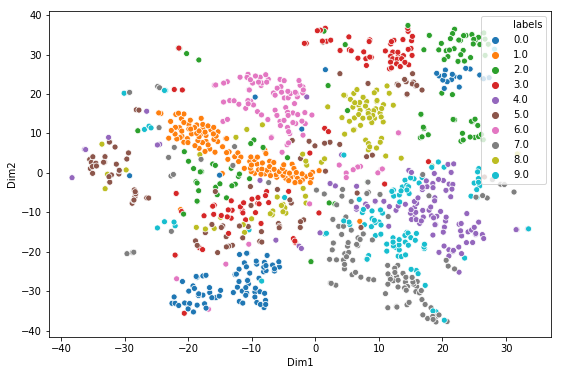

In [13]:
#Lets generate scatter plot for different TSNE parameters.
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(x1000)
newdf = pd.DataFrame(tsne_data,index=np.arange(0,1000),columns=["Dim1","Dim2"])
newdf["labels"] = y1000.astype(float)
plt.figure(figsize=(9,6))
pallt = sns.color_palette()
sns.scatterplot(newdf["Dim1"],newdf["Dim2"],hue=newdf["labels"],palette=pallt)
plt.show()

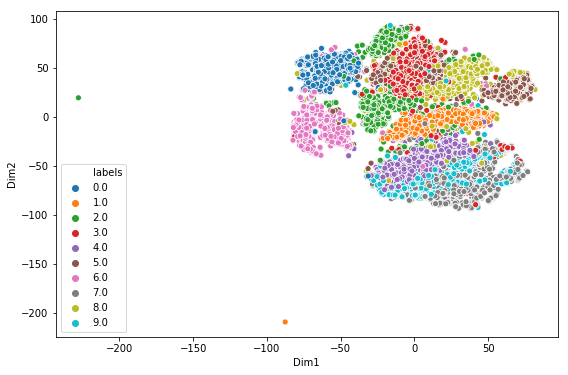

In [14]:
#Lets generate Scatter plot for first 10,000 datas.
#Reduce the dimension and create a new reduced dimensional dataframe.
x10000 = x[0:10000,:]
y10000 = y[0:10000]
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data_10k = model.fit_transform(x10000)
#Create a new dataframe of these reduced dimensions.
newdf_10k = pd.DataFrame(tsne_data_10k,index=np.arange(0,10000),columns=["Dim1","Dim2"])
newdf_10k["labels"] = y10000.astype(float)
plt.figure(figsize=(9,6))
pallt = sns.color_palette()
sns.scatterplot(newdf_10k["Dim1"],newdf_10k["Dim2"],hue=newdf_10k["labels"],palette=pallt)
plt.show()

In [32]:
#Find the shape of newly created dataset.
newdf_10k.shape

(10000, 3)

In [33]:
#List the first 5 rows of newly created dataframe.
newdf_10k.head()

,Dim1,Dim2,labels
0,18.173317,63.527409,5.0
1,-56.459888,54.765926,0.0
2,-27.342506,-69.139671,4.0
3,41.286961,-8.349404,1.0
4,11.927624,-79.256409,9.0


<b>Split the dataset using train_test_split library</b>

In [36]:
#Import train_test_split and KNeighborsClassifier Libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(tsne_data_10k,y10000,test_size=0.2,random_state=2)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(f"Accuracy Score: {accuracy_score(y_test,knn.predict(x_test))}")

Accuracy Score: 0.908


<h3>Hyper-parameter tuning using GridSearchCV</h3>

In [47]:
from sklearn.model_selection import GridSearchCV
parameter = {"n_neighbors": np.arange(2,8)}
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=parameter, scoring="accuracy",cv=10)
grid_search.fit(tsne_data_10k,y10000)
print(f"Best Estimator: {grid_search.best_estimator_}")
print("="*90)
print(f"Best Parameter: {grid_search.best_params_}")
print("="*90)
print(f"Best Accuracy Score: {grid_search.best_score_}")

Best Estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
Best Parameter: {'n_neighbors': 3}
Best Accuracy Score: 0.8985
